In [1]:
# Generic imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
import scipy.optimize as optimization
sys.path.append('../../..')
import plotly.graph_objects as go
from plotly.offline import iplot

# Local imports
import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

CUDA not available.


In [2]:
%matplotlib inline

The next cell has parameters that might change from crystal to crystal

In [3]:
# Loading in the compressed data
Segmentname = 'Segments2'
Flattenedfilename = Segmentname+'_compr_flat_filt.npz'; print(Flattenedfilename)

# Histogram accumulation: indexing starts at 0 for the upper-left, down, then across. Set to [] for all segments
accumlist = [] 

# Parameters for binning
Z2minforhist = 0.0
Z2maxforhist = .1
Z2offset = 0.001
nbins_max = 5
levels = 3

Segments2_compr_flat_filt.npz


In [4]:
# Derivative names
Roughnessfilename = Flattenedfilename[0:-4]+'_roughness.jpg'; print(Roughnessfilename)
flattenedfile = np.load(Flattenedfilename); print(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

# This folder
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)

Segments2_compr_flat_filt_roughness.jpg
Segments2_compr_flat_filt.npz
77
2023-07-03/case3.2 (roughness)


In [5]:
# Histogram accumulation
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)]
plotthisone = accumlist
print('Accumulating segments', accumlist)
print('Plotting segments', plotthisone)

# Parameters for binning
print('Z2 ranging from', Z2minforhist, 'to', Z2maxforhist)
print('Max number of bins specified is', nbins_max)
Ntot = np.size(zgridtot[0]) # Just using the first one for a size estimate
nbins_sturges = int(1+3.3*np.log10(Ntot)); print('Sturges rule says maxbins =', nbins_sturges)
nbins = np.min([nbins_max,nbins_sturges]); print('Using nbins = ', nbins)
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,nbins); #print(Z2bins)
Z2theory = np.linspace(Z2minforhist,Z2maxforhist,50) 
# Z2theory=Z2theory[1:] 
Z2theory=Z2theory[:-1] + Z2offset
print('Using levels =', levels, 'for uncertainty analysis')

Accumulating segments [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
Plotting segments [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
Z2 ranging from 0.0 to 0.1
Max number of bins specified is 5
Sturges rule says maxbins = 10
Using nbins =  5
Using levels = 3 for uncertainty analysis


Original =  759
4 0 190 [186   3   1   0]
4 1 190 [187   3   0   0]
4 2 190 [180  10   0   0]
4 3 189 [185   3   1   0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.00639017436317317
statsigma =  0.07993856618161956

****Working on segment 0
std dev of height =  0.25800162755510403
integral =  0.012845849802371542
error =  [1.53349892 1.72628758 0.2847636  0.        ]
Original =  759
4 0 190 [176  14   0   0]
4 1 190 [176  13   1   0]
4 2 190 [172  18   0   0]
4 3 189 [175  14   0   0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.008829925089517868
statsigma =  0.0939676810904572

****Working on segment 1
std dev of height =  0.26898554272628816
integral =  0.01348814229249012
error =  [0.88919991 1.04157653 0.23486906 0.        ]
Original =  759
4 0 190 [175  12   2   1]
4 1 190 [173  12   5   0]
4 2 190 [173  15   2   0]
4 3 189 [177  12   0   0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.00892207226984962
statsigma =  0.09445672167638267

***

std dev of height =  0.739488363878044
integral =  0.016414835164835165
error =  [1.4876923  0.65715252 1.99865137 0.77057964]
Original =  759
4 0 190 [176  11   3   0]
4 1 190 [174  14   2   0]
4 2 190 [178  10   2   0]
4 3 189 [176  13   0   0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.008760627037331787
statsigma =  0.09359822133636829

****Working on segment 25
std dev of height =  0.3281840406793246
integral =  0.013405797101449277
error =  [0.77179092 0.86288848 0.59470485 0.        ]
Original =  759
4 0 190 [158  19   6   7]
4 1 190 [155  25   7   2]
4 2 190 [157  26   5   1]
4 3 189 [155  26   5   2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.014625290523826306
statsigma =  0.12093506738670264

****Working on segment 26
std dev of height =  0.5301487890555817
integral =  0.014467592592592594
error =  [0.65951232 1.4801662  0.42095665 1.1906452 ]
Original =  759
4 0 190 [139  33  11   2]
4 1 190 [140  33   6   1]
4 2 190 [145  23  12   5]
4 3 189 [

std dev of height =  0.42462119782479524
integral =  0.014099604221635883
error =  [0.63633907 1.12489918 1.34987901 0.22497984]
Original =  759
4 0 190 [149  26   7   4]
4 1 190 [151  27   5   4]
4 2 190 [149  30   4   2]
4 3 189 [151  24   8   3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.0188213177624356
statsigma =  0.1371908078642137

****Working on segment 48
std dev of height =  0.5788492643287273
integral =  0.014700940860215055
error =  [0.50769282 1.0991872  0.80273283 0.42095665]
Original =  759
4 0 190 [130  33  13   4]
4 1 190 [131  32  17   4]
4 2 190 [129  34  13   5]
4 3 189 [132  25  18   6]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.02650436872155874
statsigma =  0.16280162382961277

****Working on segment 49
std dev of height =  0.6388628176468598
integral =  0.015685261707988982
error =  [0.54518727 1.72403351 1.1106309  0.4043217 ]
Original =  759
4 0 190 [150  24  13   2]
4 1 190 [147  33   6   4]
4 2 190 [150  28  10   2]
4 3 189 [14

std dev of height =  0.120423715293463
integral =  0.012845849802371544
error =  [0.8542908  1.06548783 0.24661251 0.        ]
Original =  759
4 0 190 [187   3   0   0]
4 1 190 [186   4   0   0]
4 2 190 [183   7   0   0]
4 3 189 [186   3   0   0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.005659765212214302
statsigma =  0.07523141107419362

****Working on segment 72
std dev of height =  0.11462922205004616
integral =  0.012779973649538867
error =  [0.85869436 0.93847258 0.         0.        ]
Original =  759
4 0 190 [182   7   1   0]
4 1 190 [183   6   1   0]
4 2 190 [182   8   0   0]
4 3 189 [181   7   1   0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.007372576060786165
statsigma =  0.08586370630706647

****Working on segment 73
std dev of height =  0.14606031669316336
integral =  0.013010540184453228
error =  [0.39761887 0.39761887 0.24349083 0.        ]
Original =  759
4 0 190 [143  20   6   6]
4 1 190 [145  16   6   9]
4 2 190 [144  12   9   8]
4 3 189

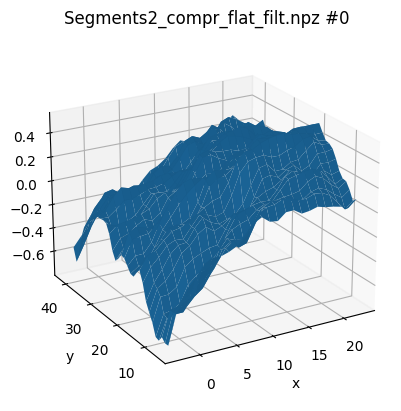

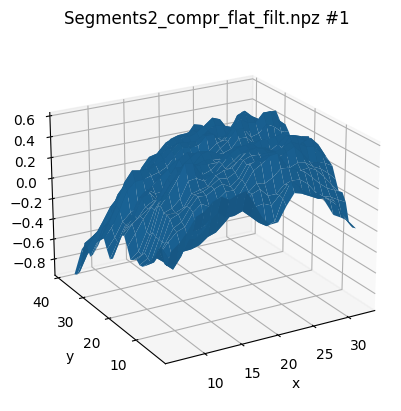

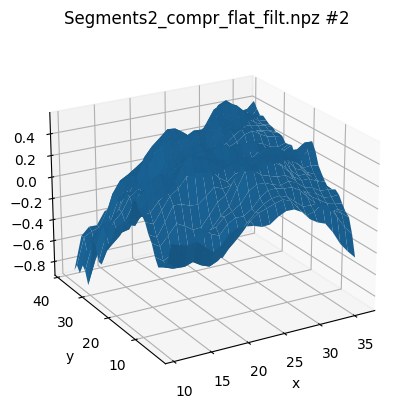

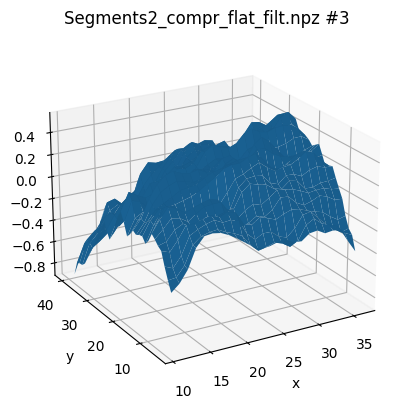

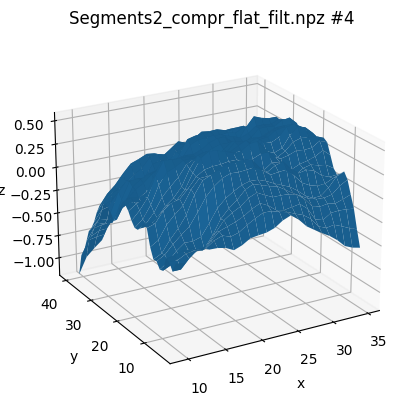

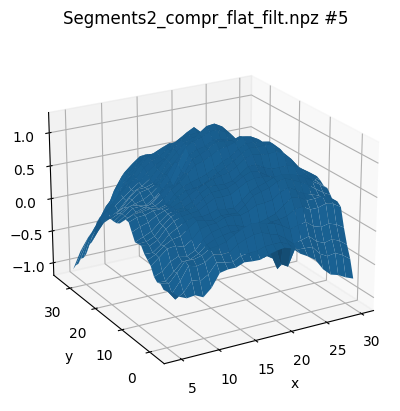

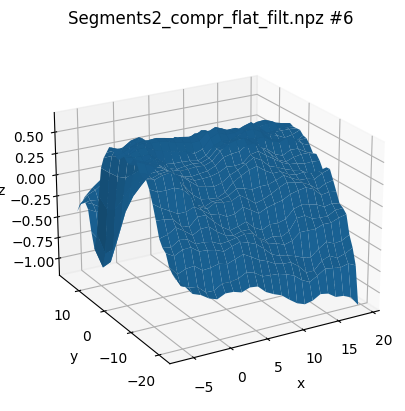

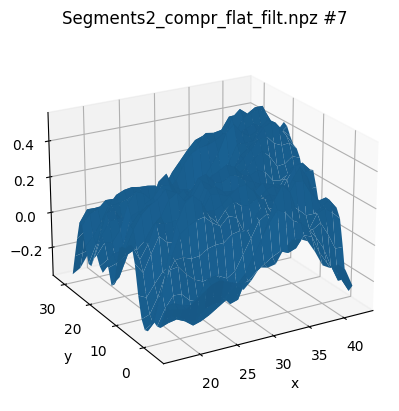

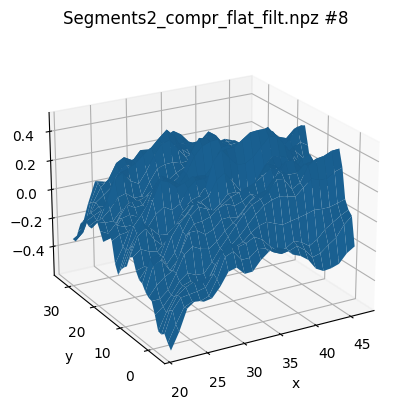

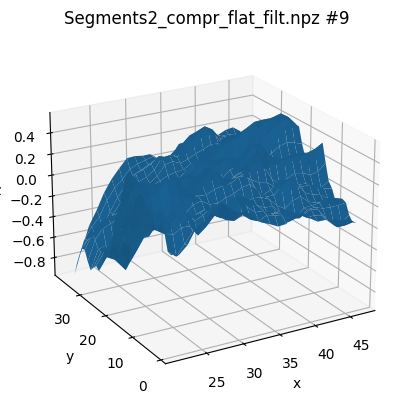

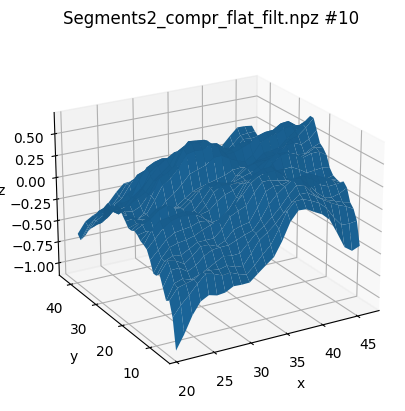

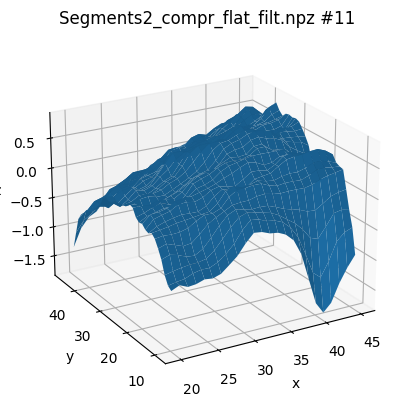

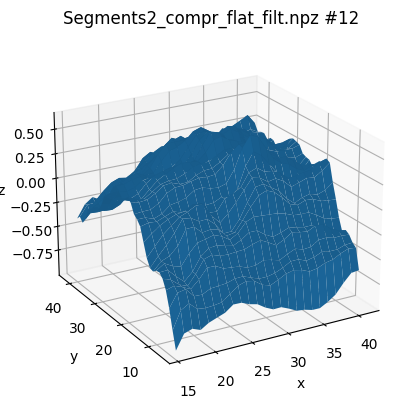

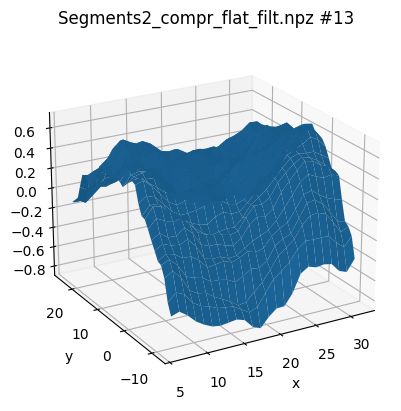

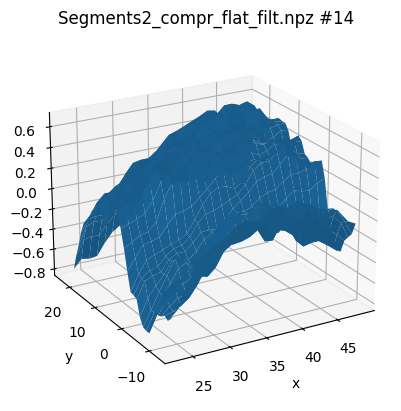

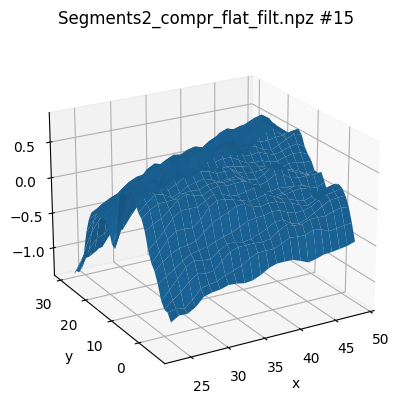

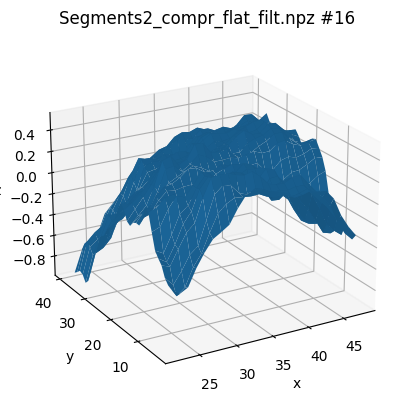

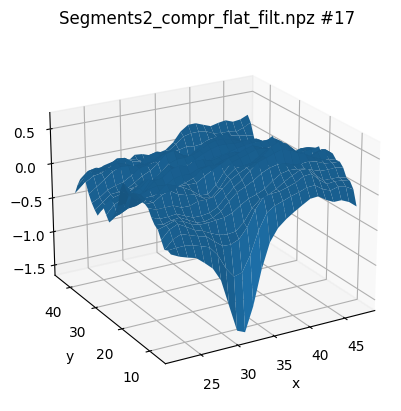

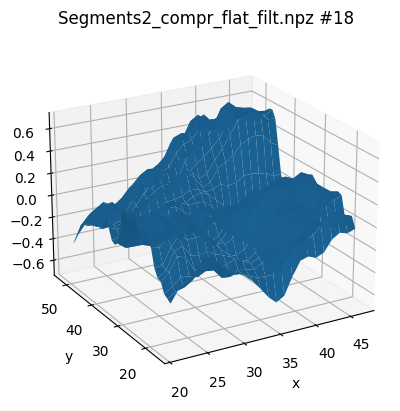

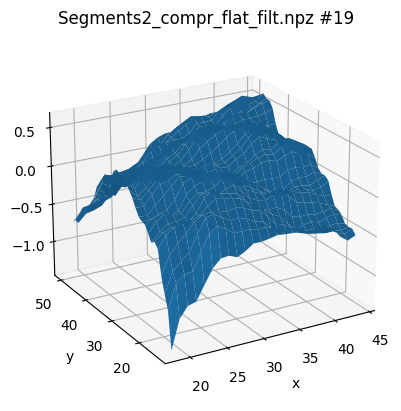

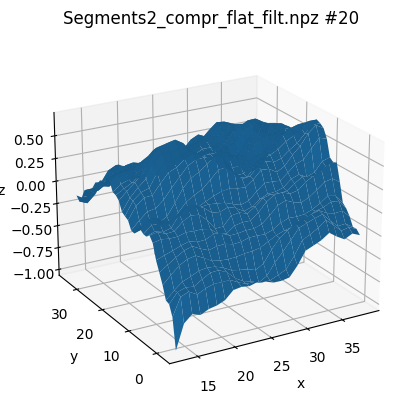

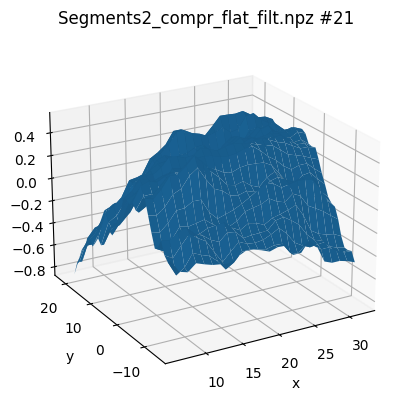

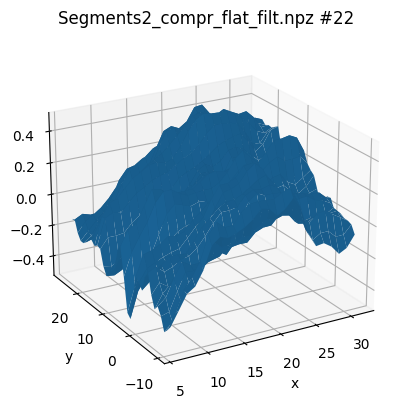

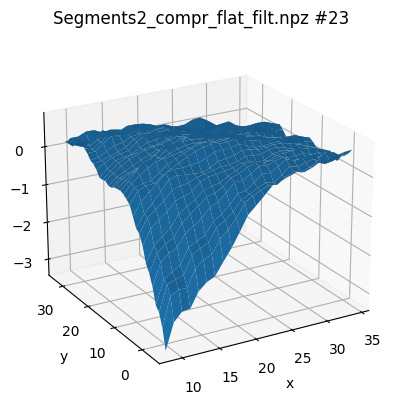

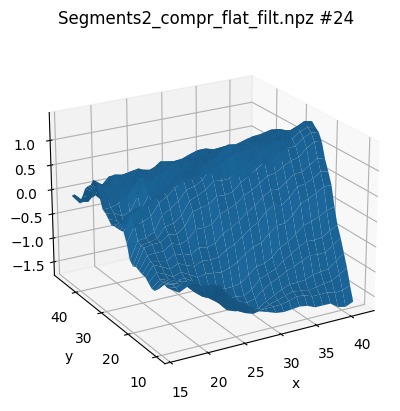

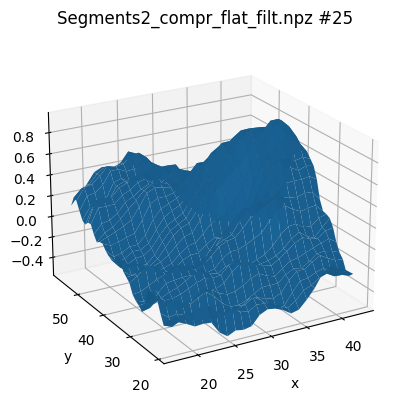

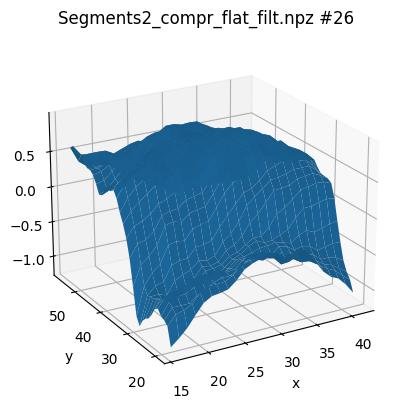

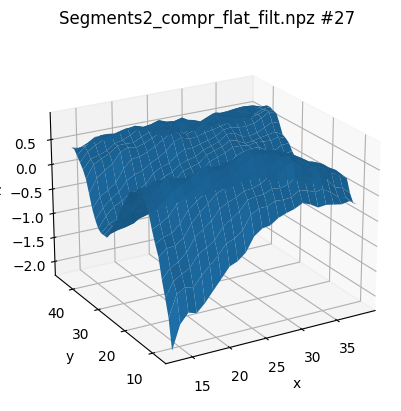

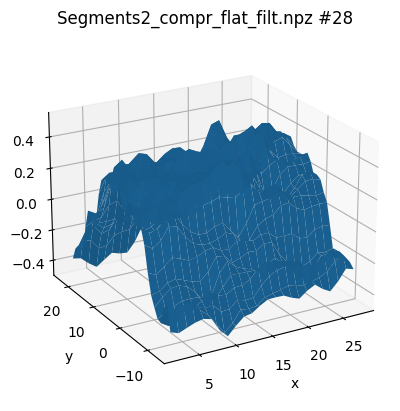

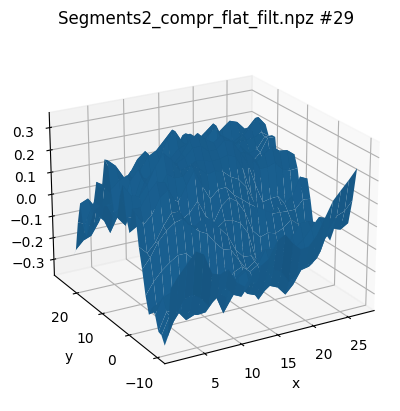

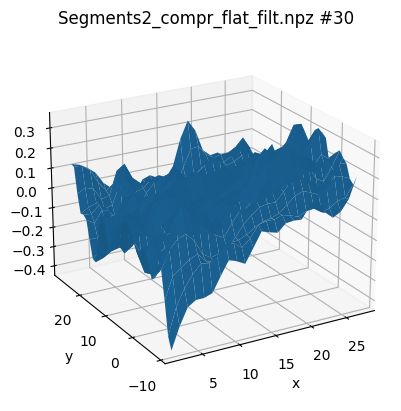

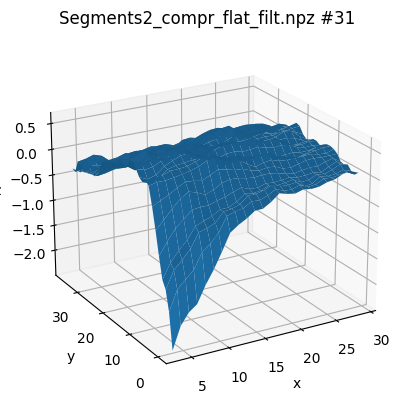

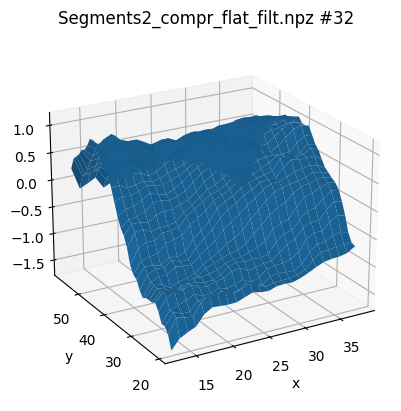

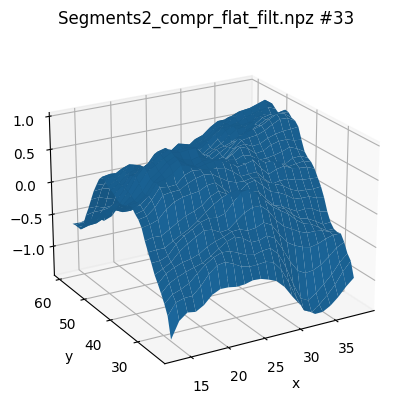

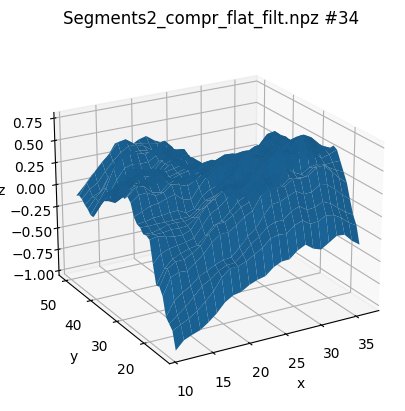

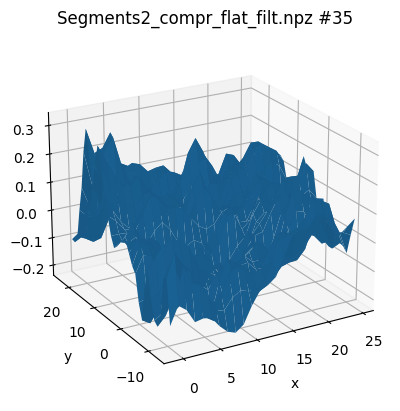

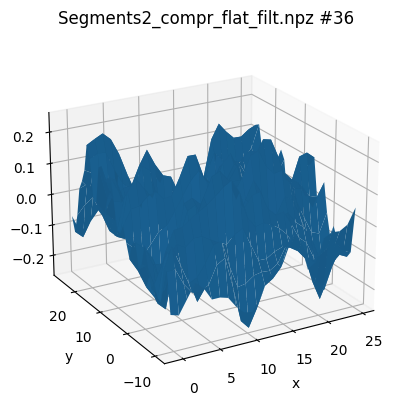

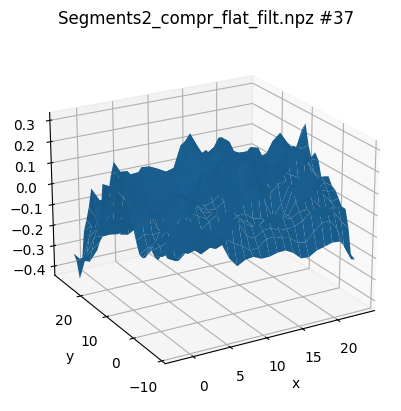

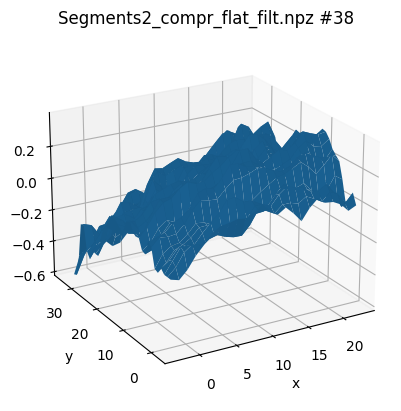

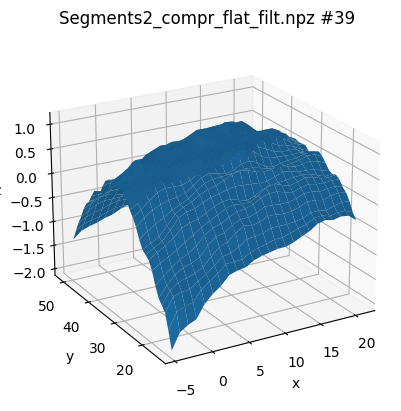

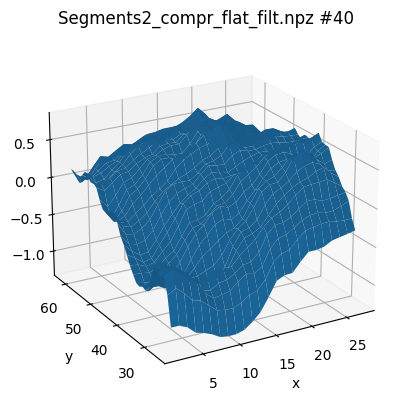

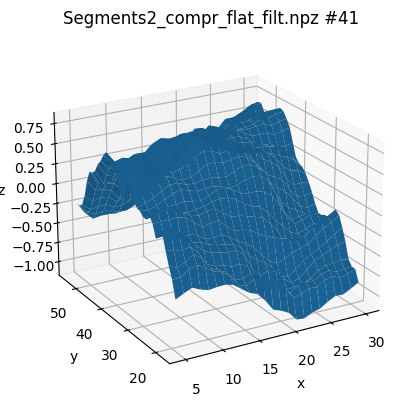

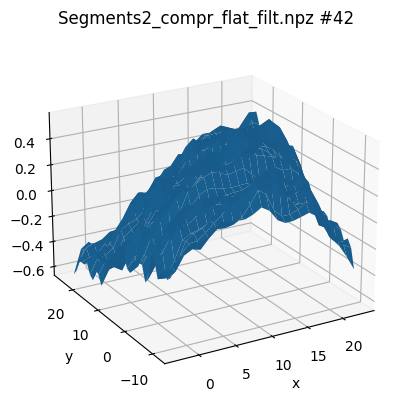

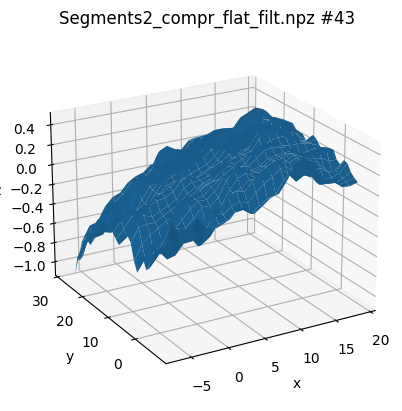

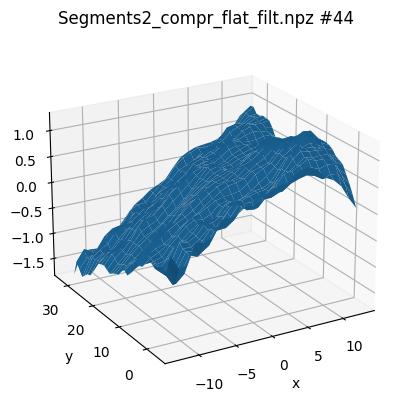

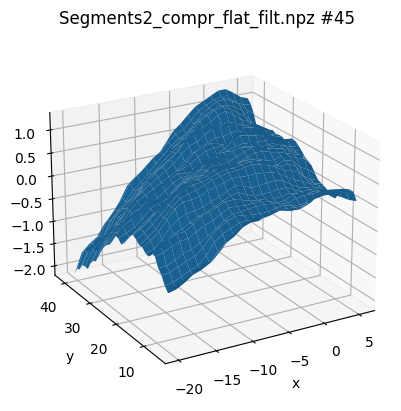

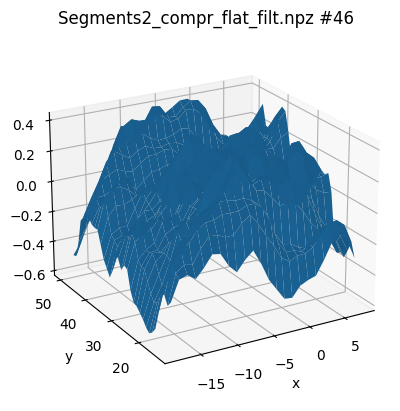

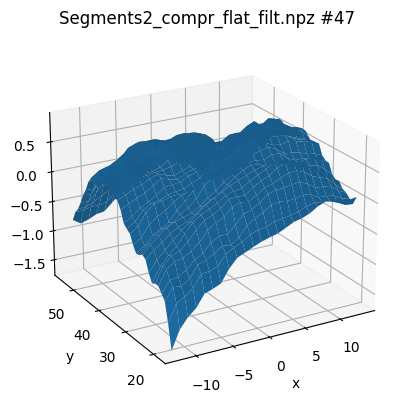

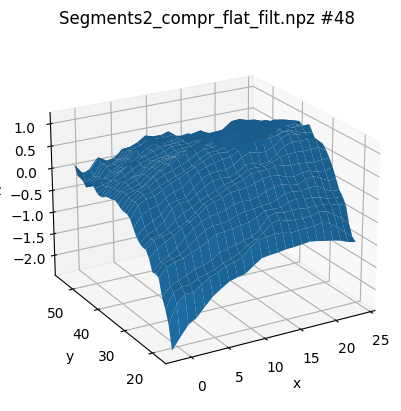

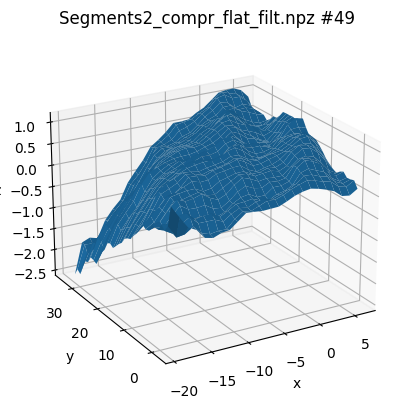

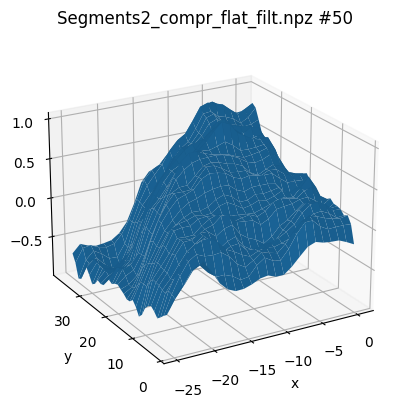

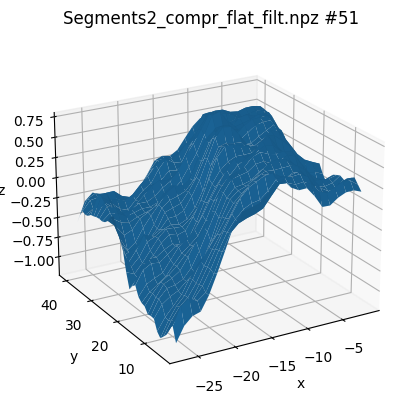

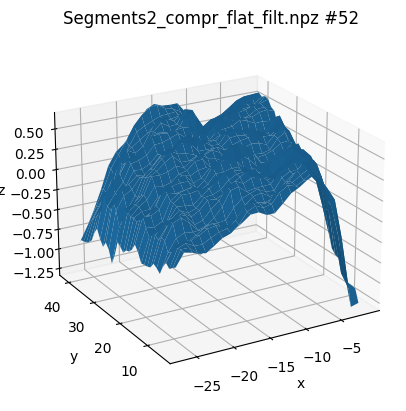

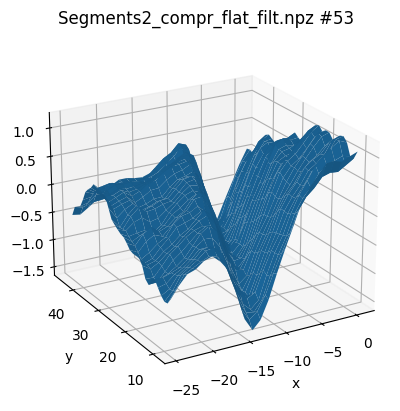

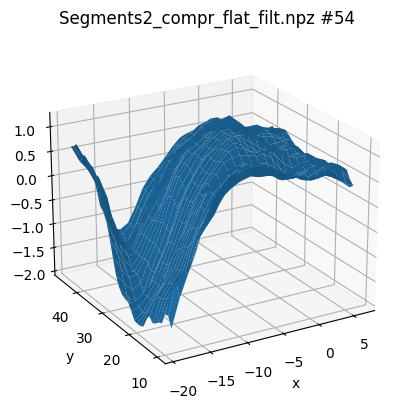

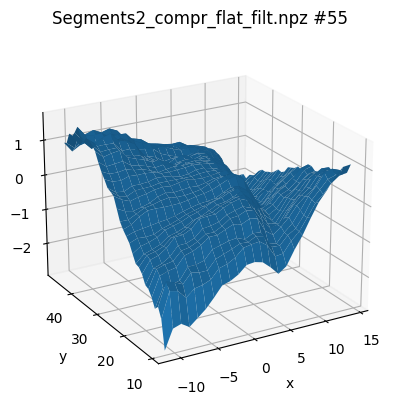

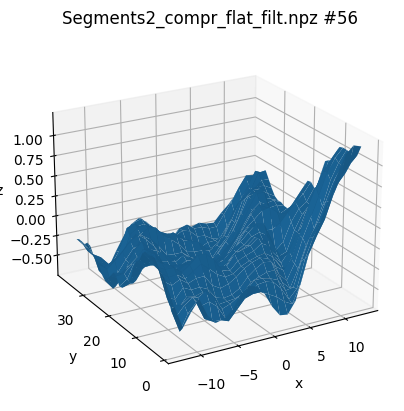

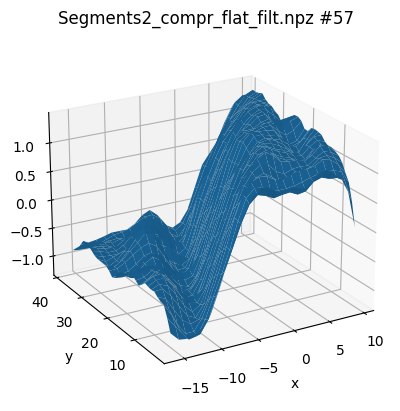

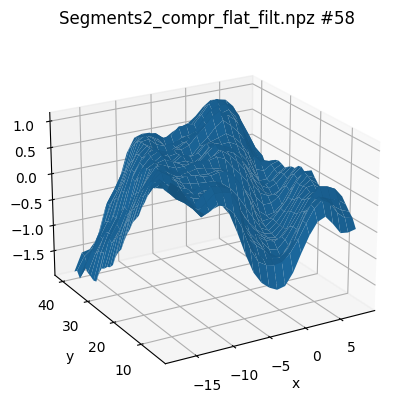

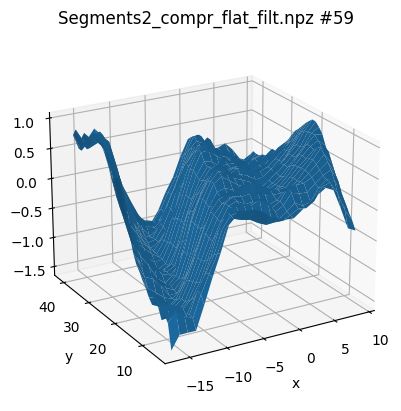

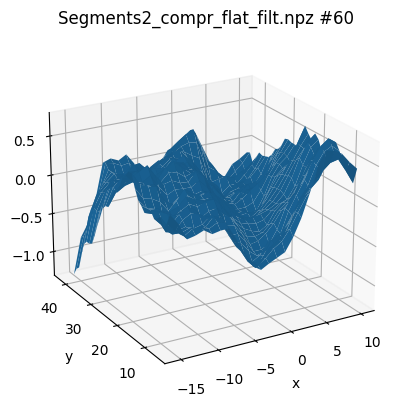

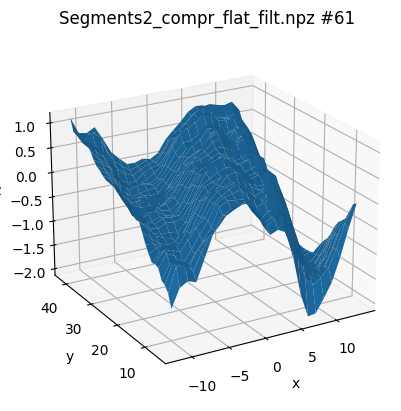

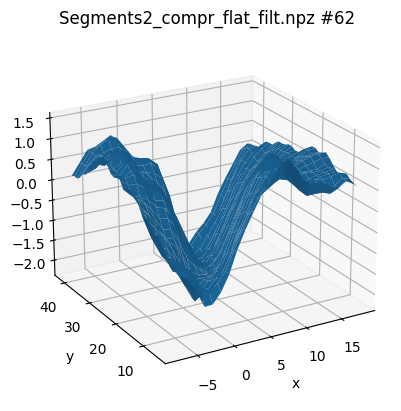

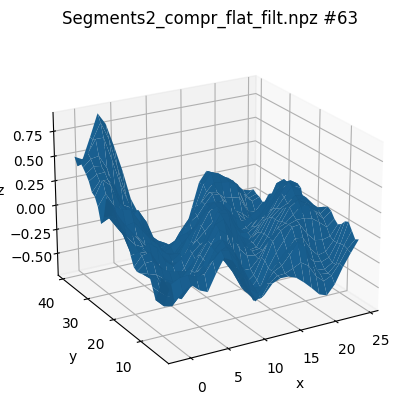

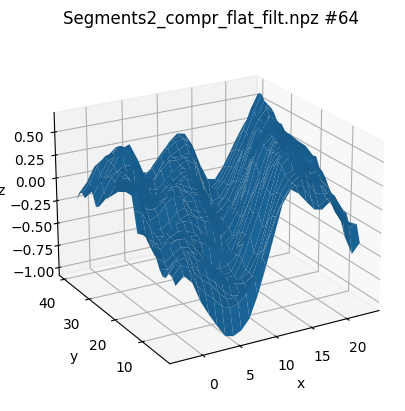

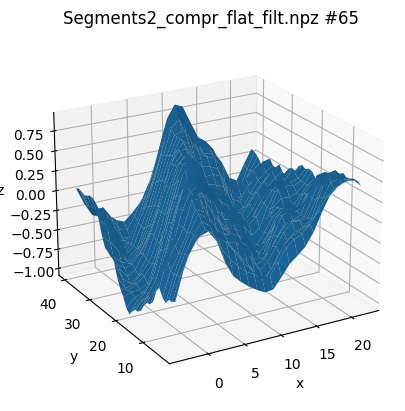

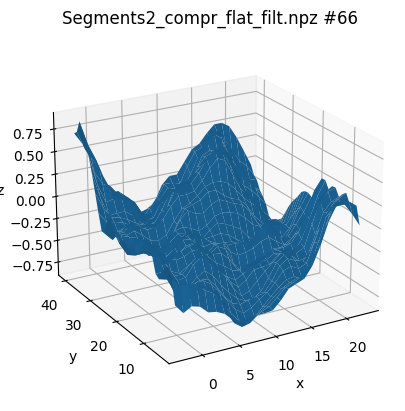

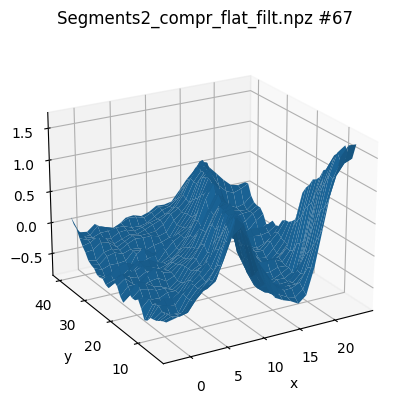

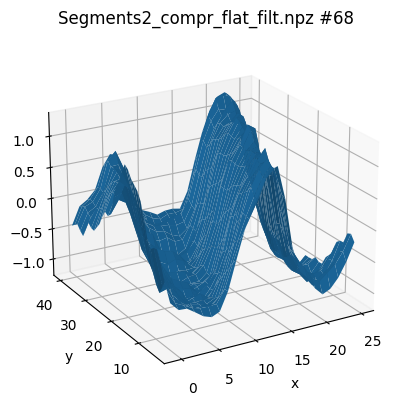

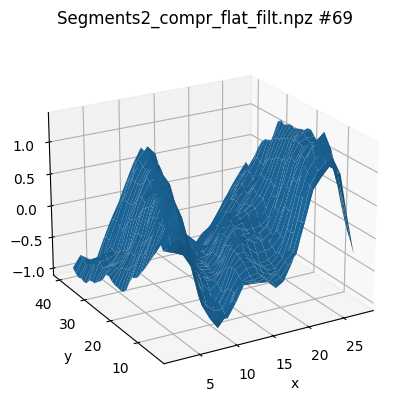

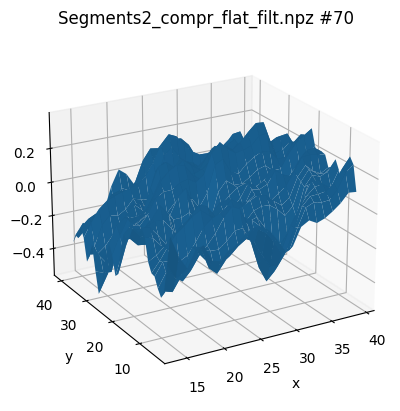

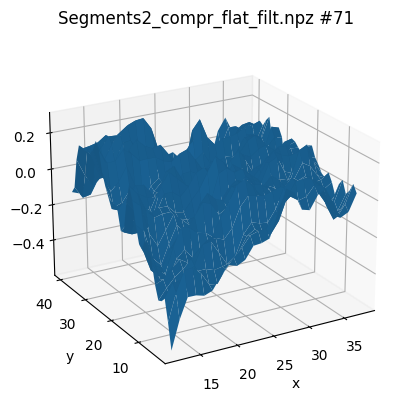

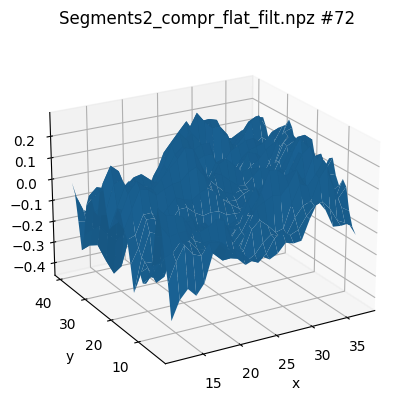

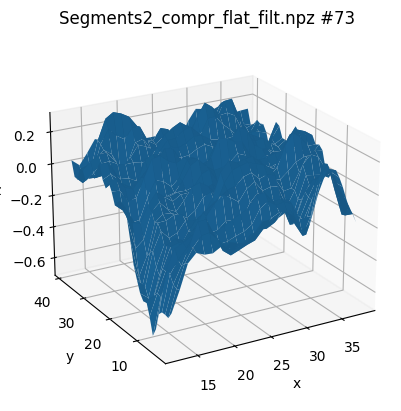

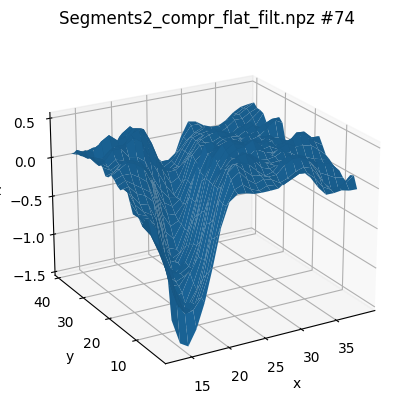

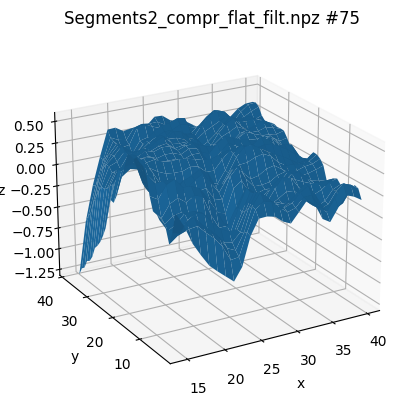

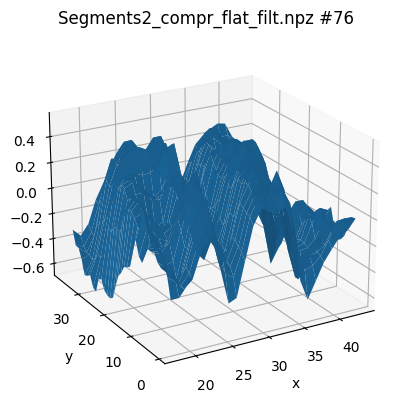

In [6]:
# Arrays for accumulating 
counts_list = []
meanZ2_list = []
Z2flat_list = []

# First-guess for Weibull fitting (sigma2W, etaW)
x0 = np.array([.1,.9])

# This suppresses warnings when lots of graphics windows are open
import matplotlib
matplotlib.rc('figure', max_open_warning = 0)

# This is for when we want to show or suppress intermediate graphics and other output
Show_intermediate_graphics = True

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    Ntot = np.size(sollast)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)

    # Get the probability distribution in Z2
    counts, bins, meanZ2, Z2flat, error = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins,levels=levels)
    print('meanZ2 = ', meanZ2)
    print('statsigma = ', np.sqrt(meanZ2))

    # Plot if we want
    if isegment in plotthisone:
        
        # Reporting
        print('')
        print('****Working on segment', isegment)
        
        # Graph the surface
        if Show_intermediate_graphics:
            fig1 = plt.figure()
            ax = fig1.add_subplot(111, projection='3d')
            ax.plot_surface(xgrid, ygrid, sollast)
            title = Flattenedfilename+' #'+str(isegment)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title(title)
            ax.view_init(azim=-120,elev=22)
        
        # Normalize the distribution function, report stats
        integral_rho = np.trapz(counts, bins)
        print ('std dev of height = ', np.std(sollast))
        print('integral = ', integral_rho)
        counts = counts/integral_rho
        error = error/integral_rho
        print('error = ', error)

    # Accumulate if we want
    if isegment in accumlist:
        counts_list.append(counts)
        meanZ2_list.append(meanZ2)
        Z2flat_list.append(Z2flat)

In [7]:
# Sum up the accumulated information
Z2flat_total = []
for i in Z2flat_list:
    for j in i:
        Z2flat_total.append(j)
Z2flat_total = np.array(Z2flat_total)
Z2flat_new = np.squeeze(Z2flat_total)

# Get the probability distribution in Z2
counts, bins, meanZ2, error = rs.getrhoofz2flat(Z2flat,nbins,Z2bins,levels)
print('meanZ2 = ', meanZ2)
print('statsigma = ', np.sqrt(meanZ2))

# Normalize the distribution function
integral_rho = np.trapz(counts, bins)
print('integral = ', integral_rho)
counts = counts/integral_rho
error = error/integral_rho
countsplus = counts+error; #print(countsplus)
countsminus = counts**2/countsplus; #print(countsminus)

Original =  759
4 0 190 [126  40  11   8]
4 1 190 [128  39  11   7]
4 2 190 [131  29  19   5]
4 3 189 [127  39  12   4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.024554064927988235
statsigma =  0.15669736732947442
integral =  0.01589673913043478


a_linear_optimized 3.7348952317223234
b_linear_optimized -41.44047911081899
sigmaG 0.1553415435080339
a_quadratic_optimized 3.8333961173813402
b_quadratic_optimized -54.83761510322013
c_quadratic_optimized 182.25739284757316
sigmaQ 0.13503946867208577
sigmaW 0.14571293653759093


(0.01, 100.0)

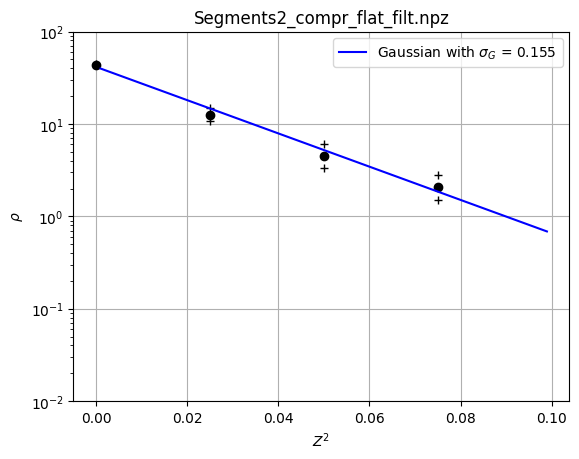

In [8]:
# Specify a title
title = Flattenedfilename

# Specify errors in a log space
errors = countsplus/counts; #print(errors)

# Do a linear fit
f_linear = lambda x, a, b: a + b*x   # function to fit
solution, corr = optimization.curve_fit(f_linear, bins+Z2offset, np.log(counts), [5, -100], errors)
a_linear_optimized = solution[0]; print('a_linear_optimized', a_linear_optimized)
b_linear_optimized = solution[1]; print('b_linear_optimized', b_linear_optimized)

# Calculate the Gaussian parameter (sigmaG) from the best-fit slope, and the resulting PDF
sigma2G = -1/b_linear_optimized
sigmaG = np.sqrt(sigma2G); print('sigmaG', sigmaG)
myGaussian = sts.Gaussian(Z2theory,sigma2G)

# Do a quadratic fit
f_quadratic = lambda x, a, b, c: a + b*x +c*x**2  # function to fit
solution, corr = optimization.curve_fit(f_quadratic, bins+Z2offset, np.log(counts), [5, -100, 0], errors)
a_quadratic_optimized = solution[0]; print('a_quadratic_optimized', a_quadratic_optimized)
b_quadratic_optimized = solution[1]; print('b_quadratic_optimized', b_quadratic_optimized)
c_quadratic_optimized = solution[2]; print('c_quadratic_optimized', c_quadratic_optimized)

# Calculate Quadratic parameters (sigmaQ, etaQ) from the best-fit slope and curvature, and the resulting PDF
sigma2Q, etaQ = sts.bc_to_Q_parameters(b_quadratic_optimized,c_quadratic_optimized)
sigmaQ = sigma2Q**.5; print('sigmaQ', sigmaQ)
myQuadratic = sts.Quadratic(Z2theory,sigma2Q,etaQ)
myQuadratic *= counts[0]/myQuadratic[0] # This is a kluge until we get the normalization factor formula

# Calculate Weibull parameters (sigmaW, etaW) from the best-fit slope and curvature, and the resulting PDF
sigma2W, etaW = sts.bc_to_Weibull_parameters(b_quadratic_optimized,c_quadratic_optimized)
sigmaW = sigma2W**.5; print('sigmaW', sigmaW)
myWeibull = sts.Weibull(Z2theory,sigma2W,etaW)

# Graph data with the best-fit probabilities
plt.figure()
plt.semilogy(bins, counts, 'ok')
plt.semilogy(bins, countsplus, '+k')
plt.semilogy(bins, countsminus,'+k')
plt.title(title)
plt.xlabel(r'$Z^{2}$')
plt.ylabel(r'$\rho$')
plt.grid(True)
plt.semilogy(Z2theory, myGaussian, 'b',label = 'Gaussian with $\sigma_G$ = ' + str(sigmaG)[0:5])
# plt.semilogy(Z2theory, myWeibull, 'g',label = \
#              'Weibull with $\sigma_W$ = ' + str(sigmaW)[0:5] + ', $\eta_W$ = ' + str(etaW)[0:5])
# plt.semilogy(Z2theory, myQuadratic, 'r--',label = \
#              'Quadratic with $\sigma_Q$ = ' + str(sigmaQ)[0:5] + ', $\eta_Q$ = ' + str(etaQ)[0:5])
plt.legend()
plt.ylim([1e-2,1e2])

In [9]:
# # Save the roughness figure
# plt.savefig(Roughnessfilename)

In [10]:
# Saving ith segment as a textfile.
saving_text_file = False
if saving_text_file:
    iSegment = 0
    zfilename = Segmentname+'_z_values.csv'; print(zfilename)
    xfilename = Segmentname+'_x_values.csv'; print(xfilename)
    yfilename = Segmentname+'_y_values.csv'; print(yfilename)
    Z2filename = Segmentname+'_Z2_values.csv'; print(Z2filename)
    print(np.shape(zgridtot))
    print(np.shape(Z2flat_list[iSegment]))

    myxgridtot = xgridtot[iSegment,0,:]
    myygridtot = ygridtot[iSegment,:,0]
    myzgridtot = zgridtot[iSegment,:,:]
    myZ2flat = Z2flat_list[iSegment]

    nxy = np.shape(myzgridtot)
    ny = nxy[0]
    nx = nxy[1]
    print(nxy)

    myZ2 = np.reshape(myZ2flat, (ny-1,nx-1)) # Z2 is 1 shorter in either dimension

    print(np.shape(myZ2))
    np.savetxt(zfilename, myzgridtot, delimiter = ',')
    np.savetxt(xfilename, myxgridtot, delimiter = ',')
    np.savetxt(yfilename, myygridtot, delimiter = ',')
    np.savetxt(Z2filename, Z2flat_list[iSegment], delimiter = ',')

    fig = go.Figure(data = go.Surface(x = myxgridtot[1:], y = myygridtot[1:], z = myZ2))
    fig.update_layout(scene = dict(xaxis_title = 'x',yaxis_title = 'y',zaxis_title = 'z'))